In [1]:
# Bike Sharing Assignment by Abhishek Pandey

## Importing all the important packages

In [49]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import 'numpy' and 'pandas' for working with numbers and data frames
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for regression from 'statsmodels'
import statsmodels.formula.api as sm

# Import methods for regression diagnostic plots from 'statsmodels'
from statsmodels.api import ProbPlot, qqplot

from sklearn.model_selection import train_test_split


#### Reading the input dataset

In [3]:
inp_0 = pd.read_csv(r'C:\Users\abhis\Documents\IIITB\linear regression\bike sharing assignment\day.csv')

In [4]:
inp_0.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
## Understanding the summary stats of the data -- to check if there are outliers in the data or not

inp_0.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
## Categorical Variables:
## season,yr,mnth,holiday,weekday,workingday,weathersit 


In [7]:
## Now let us see if there are null values in the data
inp_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#### There are no null values so lets check null values sum as well for each column which will confirm that there are no null values

inp_0.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
## Lets understand the data definition of the given dataset

## day.csv have the following fields:
	
	# instant: record index  - We can leave this as it seems to be serial number only
	# dteday : date - not considering this as this seems to be of little relevance
	# season : season (1:spring, 2:summer, 3:fall, 4:winter)
	# yr : year (0: 2018, 1:2019)
	# mnth : month ( 1 to 12)
	# holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	# weekday : day of the week
	# workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	# weathersit : 
		# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	# temp : temperature in Celsius
	# atemp: feeling temperature in Celsius
	# hum: humidity
	# windspeed: wind speed
	# casual: count of casual users -- Not considering this since its included in cnt variable
	# registered: count of registered users -- Not considering this since its included in cnt variable
	# cnt: count of total rental bikes including both casual and registered

In [10]:
## List for Numerical Variables

var_num = ['temp','atemp','hum','windspeed','cnt']

## List for Categorical Variables

var_cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


## Visualizing the Numeric Variables

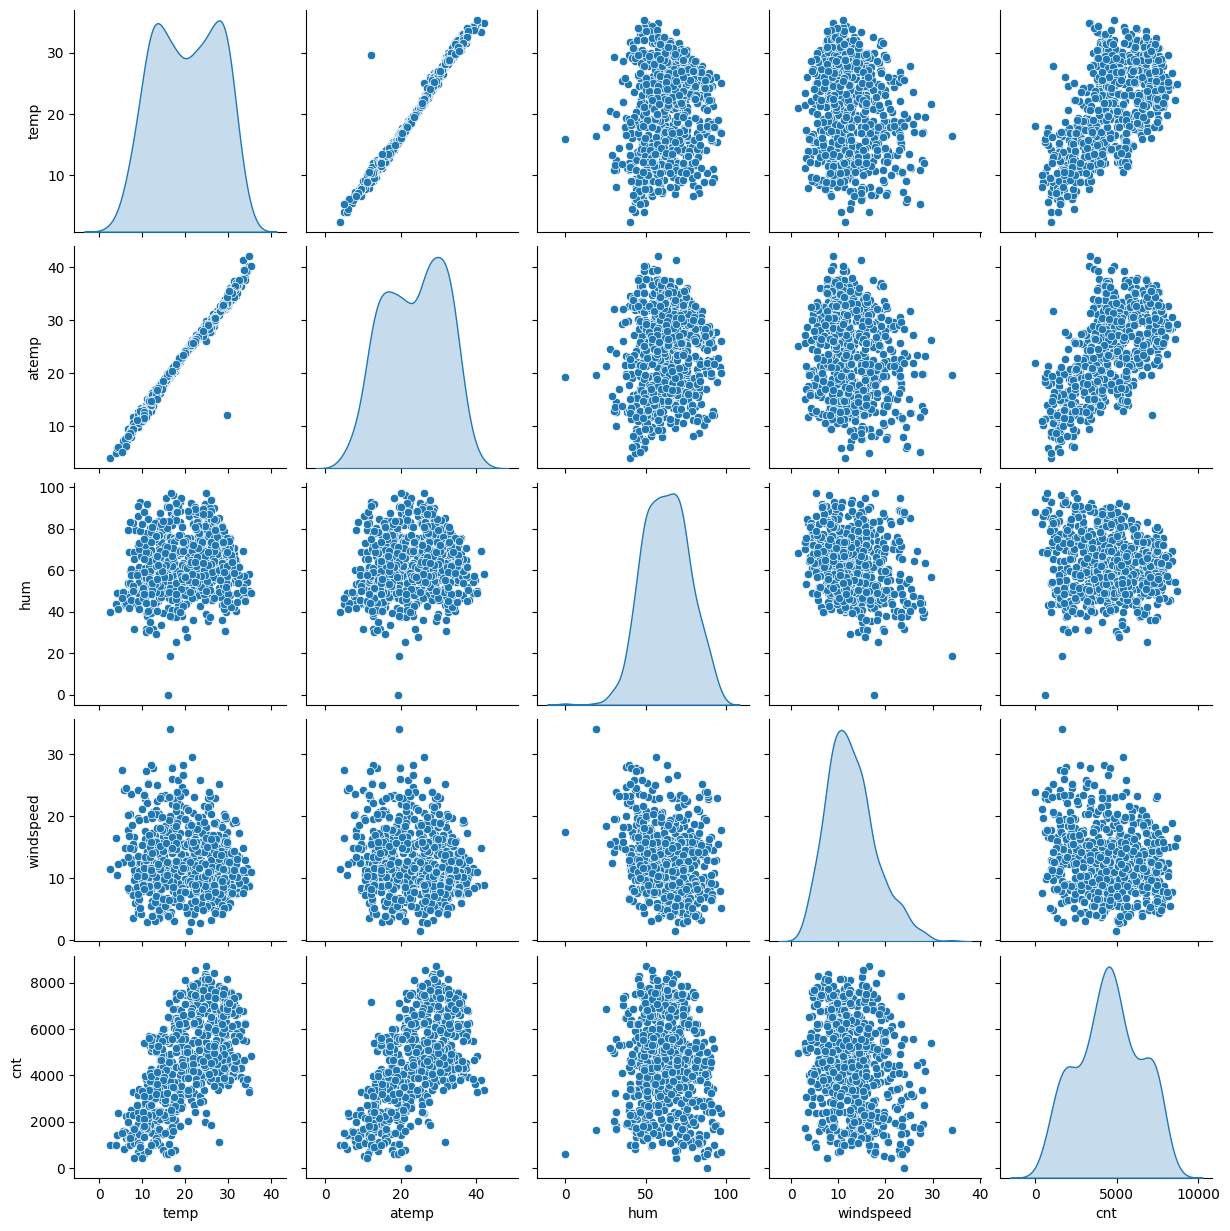

In [11]:
## Let create pairplot between the numeric variables

sns.pairplot(inp_0[var_num],diag_kind = 'kde')
plt.show()

## Findings

#### Perfect correlation between temp and atemp
#### Strong correlation between cnt and temp, cnt and atemp
#### windspeed and cnt are negatively correlated



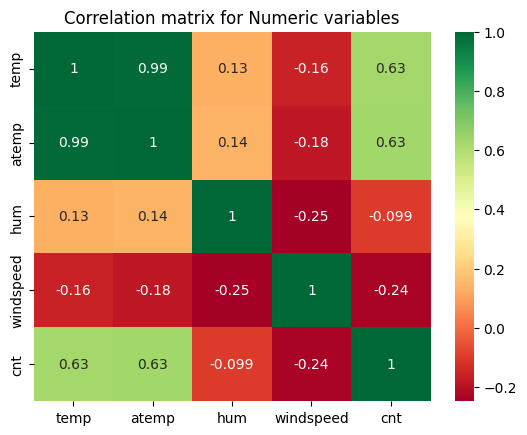

In [12]:
## Lets validate the above findings

sns.heatmap(inp_0[var_num].corr(),annot = True, cmap = "RdYlGn")
plt.title("Correlation matrix for Numeric variables")
plt.show()




### Observations

##### - We see a perferct correlation between the variable temp and atemp so its better to remove one of the variable to avoid multi -  collinearity
##### - We still need validate this by VIF and model scores
##### - There is a strong correlation between cnt and temp , cnt and atemp having the score of (0.63)

##### - We can see windspeed is negatively correlated having the score -0.24


In [13]:
## Now lets visualize the categorical variables

In [14]:
## List for Categorical Variables which we created earlier ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [15]:
### We will create pie chart to understand the share of sales and Box plot to understand the distribution of sales

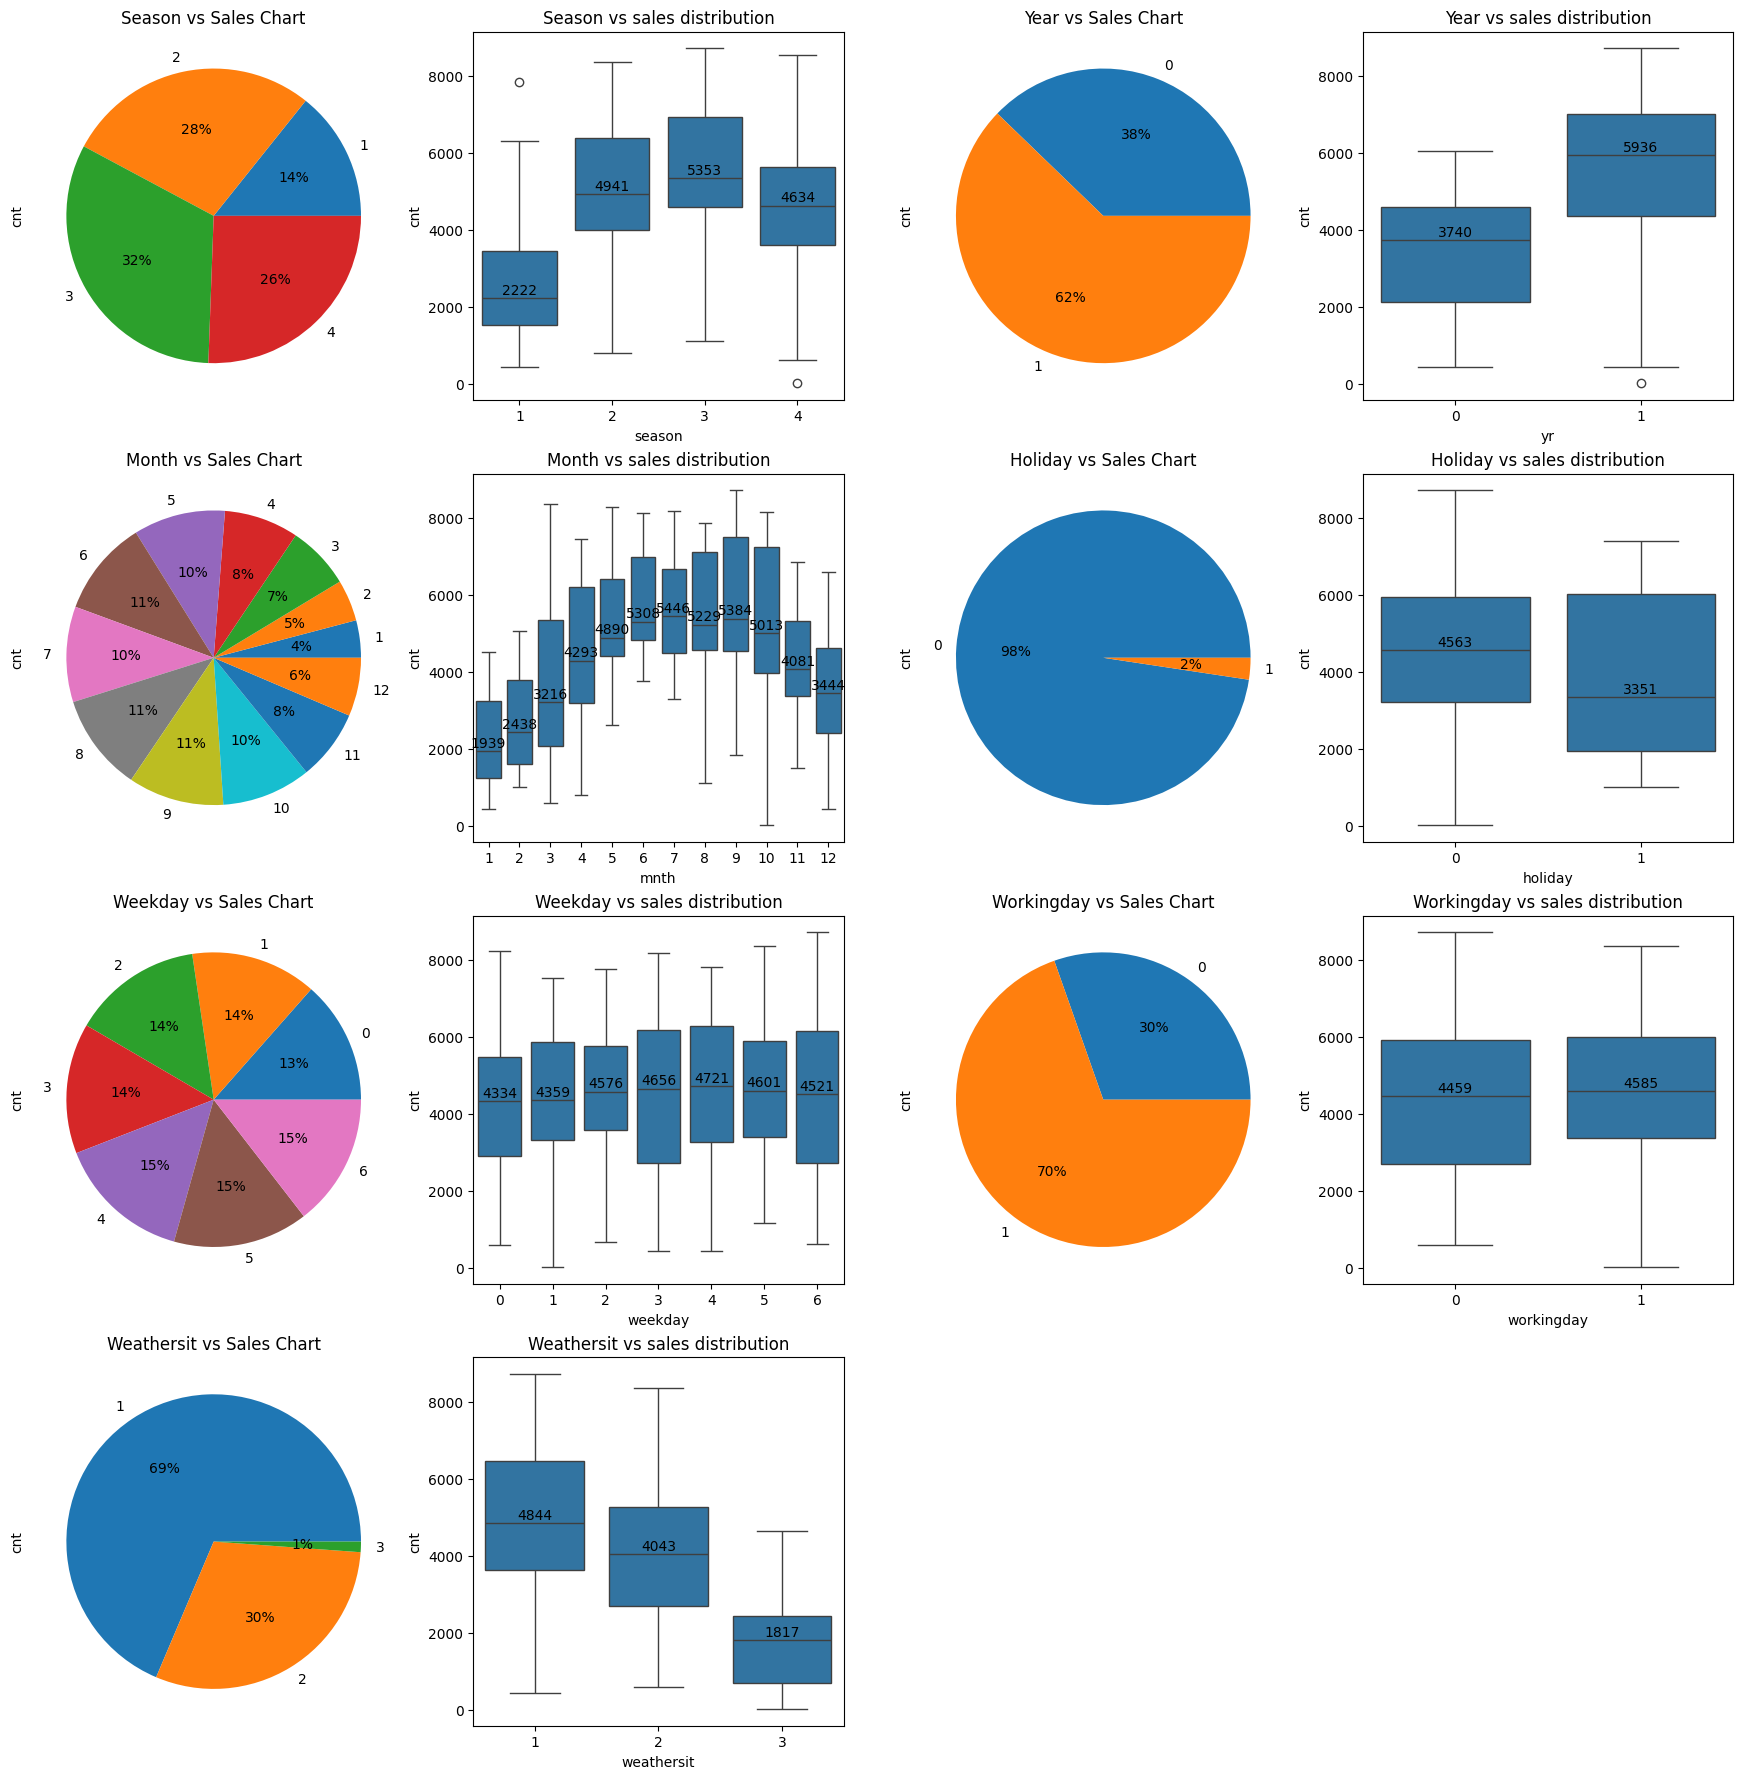

In [16]:
fig = plt.figure(figsize = (22,22))

ax1 = plt.subplot(4,4,1)
inp_0.groupby(['season']).sum().plot(kind='pie' ,y = 'cnt' , autopct = "%1.0f%%", ax = ax1 )
ax1.get_legend().remove()
plt.title("Season vs Sales Chart")

ax2 = plt.subplot(4,4,2)
box1 = sns.boxplot(x = 'season',y = 'cnt',data = inp_0, ax = ax2)
medians = inp_0.groupby(['season'])['cnt'].median()
for i, median in enumerate(medians):
    box1.text(i, median+100,f'{int(median)}', color = 'black' , ha = 'center')
plt.title("Season vs sales distribution")    

ax1 = plt.subplot(4,4,3)
inp_0.groupby(['yr']).sum().plot(kind='pie' ,y = 'cnt' , autopct = "%1.0f%%", ax = ax1 )
ax1.get_legend().remove()
plt.title("Year vs Sales Chart")

ax2 = plt.subplot(4,4,4)
box1 = sns.boxplot(x = 'yr',y = 'cnt',data = inp_0, ax = ax2)
medians = inp_0.groupby(['yr'])['cnt'].median()
for i, median in enumerate(medians):
    box1.text(i, median+100,f'{int(median)}', color = 'black' , ha = 'center')
plt.title("Year vs sales distribution")

ax1 = plt.subplot(4,4,5)
inp_0.groupby(['mnth']).sum().plot(kind='pie' ,y = 'cnt' , autopct = "%1.0f%%", ax = ax1 )
ax1.get_legend().remove()
plt.title("Month vs Sales Chart")

ax2 = plt.subplot(4,4,6)
box1 = sns.boxplot(x = 'mnth',y = 'cnt',data = inp_0, ax = ax2)
medians = inp_0.groupby(['mnth'])['cnt'].median()
for i, median in enumerate(medians):
    box1.text(i, median+100,f'{int(median)}', color = 'black' , ha = 'center')
plt.title("Month vs sales distribution")


ax1 = plt.subplot(4,4,7)
inp_0.groupby(['holiday']).sum().plot(kind='pie' ,y = 'cnt' , autopct = "%1.0f%%", ax = ax1 )
ax1.get_legend().remove()
plt.title("Holiday vs Sales Chart")

ax2 = plt.subplot(4,4,8)
box1 = sns.boxplot(x = 'holiday',y = 'cnt',data = inp_0, ax = ax2)
medians = inp_0.groupby(['holiday'])['cnt'].median()
for i, median in enumerate(medians):
    box1.text(i, median+100,f'{int(median)}', color = 'black' , ha = 'center')
plt.title("Holiday vs sales distribution")

ax1 = plt.subplot(4,4,9)
inp_0.groupby(['weekday']).sum().plot(kind='pie' ,y = 'cnt' , autopct = "%1.0f%%", ax = ax1 )
ax1.get_legend().remove()
plt.title("Weekday vs Sales Chart")

ax2 = plt.subplot(4,4,10)
box1 = sns.boxplot(x = 'weekday',y = 'cnt',data = inp_0, ax = ax2)
medians = inp_0.groupby(['weekday'])['cnt'].median()
for i, median in enumerate(medians):
    box1.text(i, median+100,f'{int(median)}', color = 'black' , ha = 'center')
plt.title("Weekday vs sales distribution")

ax1 = plt.subplot(4,4,11)
inp_0.groupby(['workingday']).sum().plot(kind='pie' ,y = 'cnt' , autopct = "%1.0f%%", ax = ax1 )
ax1.get_legend().remove()
plt.title("Workingday vs Sales Chart")

ax2 = plt.subplot(4,4,12)
box1 = sns.boxplot(x = 'workingday',y = 'cnt',data = inp_0, ax = ax2)
medians = inp_0.groupby(['workingday'])['cnt'].median()
for i, median in enumerate(medians):
    box1.text(i, median+100,f'{int(median)}', color = 'black' , ha = 'center')
plt.title("Workingday vs sales distribution")


ax1 = plt.subplot(4,4,13)
inp_0.groupby(['weathersit']).sum().plot(kind='pie' ,y = 'cnt' , autopct = "%1.0f%%", ax = ax1 )
ax1.get_legend().remove()
plt.title("Weathersit vs Sales Chart")

ax2 = plt.subplot(4,4,14)
box1 = sns.boxplot(x = 'weathersit',y = 'cnt',data = inp_0, ax = ax2)
medians = inp_0.groupby(['weathersit'])['cnt'].median()
for i, median in enumerate(medians):
    box1.text(i, median+100,f'{int(median)}', color = 'black' , ha = 'center')
plt.title("Weathersit vs sales distribution")

plt.show()

## Observations

### Basis Season

#### - There is no major difference in seasons but Season 3 is having the maximum 32% followed by Season 2 and 4, however Season 1 returns lowest sales
#### - Also, the median sales is highest in season 3 which is obvious since its having the maximum sales


### Basis Year

#### - 2019 is having 62% sales which is significant increase over 2018 which is having 38% sales, hence the corresponding to the same median sales in 2019 is over 5900 units



### Basis Month

#### - Month 3,4 and 11 have average median sales
#### - Month 1,2 and 12 have low median sales
#### - Month 5,6,7,8,9,10 have much higher median sales around 5K
#### - Month 5 to 10 all touching the double digit percentage of sales as compared to the other months


### Basis Holiday


#### - 98% sales made in Non holidays which suggests people are using the services on non holidays for their commute


### Basis Weekday

#### - There is no specific trend for weekdays as all days account for 14-15% sales
#### - Median sales is similar across all weekdays, 0,1 and 5 have wider sales rangee

### Basis Working day
#### - 70% sales made on a working day
#### - Not much difference in median which is around ~4.4k 

### Basis Weathersit

#### - 1: Clear, Few clouds, Partly cloudy, Partly cloudy:  69%
#### - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist: 32%
#### - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds: just 3%
#### - Highest median is observed for the group 1 (Clear, Few clouds, Partly cloudy, Partly cloudy)




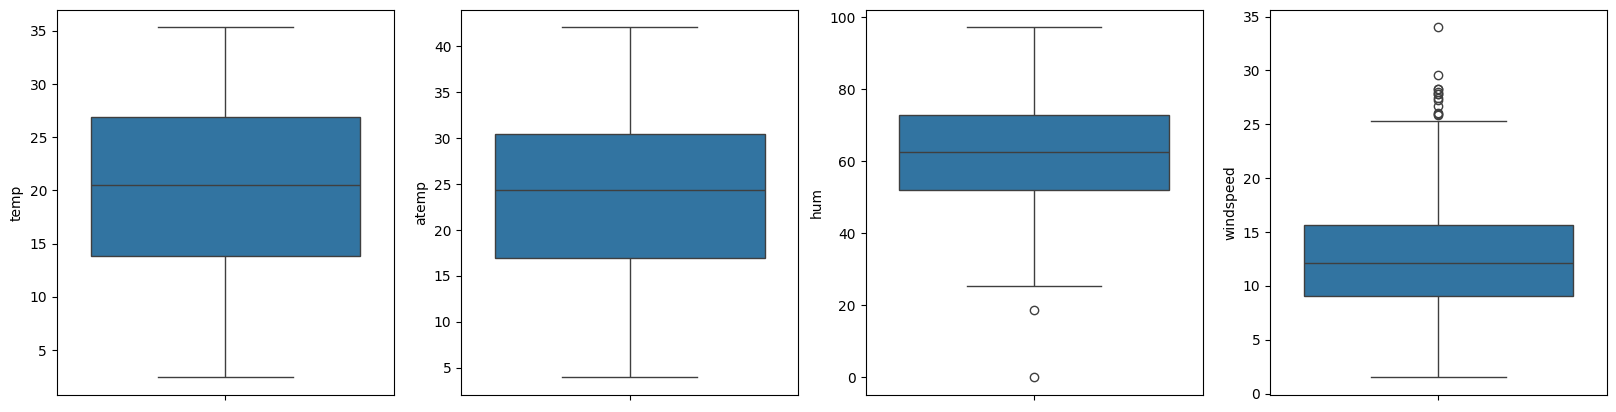

In [17]:
## Let understand the numerical features if they have any outliers

plt.figure(figsize = (20,5))

plt.subplot(1,4,1)
sns.boxplot(y = 'temp' , data = inp_0)

plt.subplot(1,4,2)
sns.boxplot(y = 'atemp' , data = inp_0)

plt.subplot(1,4,3)
sns.boxplot(y = 'hum' , data = inp_0)

plt.subplot(1,4,4)
sns.boxplot(y = 'windspeed' , data = inp_0)


plt.show()



In [18]:
## We can check the values 0 humidity and 35 windspeed which are shown as outliers in the data

inp_0[(inp_0.hum == 0) | (inp_0.windspeed > 30)]




,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,19-02-2018,1,0,2,0,6,0,1,16.365847,19.5702,18.7917,34.000021,532,1103,1635
68,69,10-03-2018,1,0,3,0,4,1,3,15.952731,19.2834,0.0000,17.545759,46,577,623


In [19]:
# The above values seems to be normal hence not removing these

### Now lets create the dummy variables since categorical variables have multiple levels

In [20]:
# Analysing the datatype of all variables

inp_0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [96]:
## Now we will convert the categorical variables to category type where they have more than 2 categories in this case we will perform this on season,mnth,weekday,weathersit
## We don't have to do anything to variable which have only two categories


inp_0['season'] = inp_0['season'].astype('category')
inp_0['mnth'] = inp_0['mnth'].astype('category')
inp_0['weekday'] = inp_0['weekday'].astype('category')
inp_0['weathersit'] = inp_0['weathersit'].astype('category')






In [22]:
inp_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    object  
 2   season      730 non-null    category
 3   yr          730 non-null    int64   
 4   mnth        730 non-null    category
 5   holiday     730 non-null    int64   
 6   weekday     730 non-null    category
 7   workingday  730 non-null    int64   
 8   weathersit  730 non-null    category
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  hum         730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(7), object(1)
memory usage: 72.5+ KB


In [23]:
## Dropping the unwanted variables

inp_0.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)

In [24]:
inp_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


#### Using the pd.get_dummies() function to create dummy variables

##### Also we will use the argument drop_first = True which helps in avoiding the unnecessary variables like 00 season1,10 season1,01 season1,11 season1



In [25]:
inp_1 = pd.get_dummies(inp_0, drop_first = True)

In [26]:
## Setting the parameters to show all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

inp_1.head()



,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [27]:
## Lets now rename the columns to make it more meaningful

# Renaming seasons

inp_1.rename(columns ={'season_2':'sea_summer','season_3':'sea_fall','season_4':'sea_winter'}, inplace = True)




In [28]:
# Renaming Months

inp_1.rename(columns = {'mnth_2' : 'feb','mnth_3' : 'mar','mnth_4' : 'apr','mnth_5' : 'may','mnth_6' : 'jun',
                       'mnth_7' : 'jul','mnth_8' : 'aug','mnth_9' : 'sep','mnth_10' : 'oct','mnth_11' : 'nov','mnth_12' : 'dec'}, inplace = True)

In [29]:
# Renaming Weathersit

inp_1.rename(columns = {'weathersit_2' : 'weather_mod','weathersit_3' : 'weather_extrm'}, inplace = True)


In [30]:
inp_1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,sea_summer,sea_fall,sea_winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_mod,weather_extrm
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


### Creating Training and test datasets

In [31]:
df_train, df_test = train_test_split(inp_1, train_size = 0.7, test_size = 0.3, random_state = 25)

## Scaling the features 
### We will scale training data first so that test data remains unseen to the sclar

In [32]:
# Using the minmax scaling

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()




In [33]:
# We will only apply MinMax scalar to numeric variables only

df_train[var_num] = scalar.fit_transform(df_train[var_num])
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,sea_summer,sea_fall,sea_winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_mod,weather_extrm
625,1,0,1,0.699946,0.628291,0.897172,0.829755,0.466061,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
698,1,0,1,0.268136,0.303249,0.667952,0.042547,0.649563,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
134,0,0,0,0.619121,0.589120,0.891602,0.291272,0.521284,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
528,1,0,1,0.743127,0.690349,0.598543,0.792100,0.851243,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
722,1,0,1,0.179078,0.215699,0.813680,0.091918,0.103313,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False


In [34]:
# Dividing the training data into X = Independent features and Y = dependent variable

y_train = df_train.pop('cnt')
x_train = df_train

In [35]:
print(y_train.head())
print(x_train.head())

625    0.466061
698    0.649563
134    0.521284
528    0.851243
722    0.103313
Name: cnt, dtype: float64
     yr  holiday  workingday      temp     atemp       hum  windspeed  \
625   1        0           1  0.699946  0.628291  0.897172   0.829755   
698   1        0           1  0.268136  0.303249  0.667952   0.042547   
134   0        0           0  0.619121  0.589120  0.891602   0.291272   
528   1        0           1  0.743127  0.690349  0.598543   0.792100   
722   1        0           1  0.179078  0.215699  0.813680   0.091918   

     sea_summer  sea_fall  sea_winter    feb    mar    apr    may    jun  \
625       False      True       False  False  False  False  False  False   
698       False     False        True  False  False  False  False  False   
134        True     False       False  False  False  False   True  False   
528        True     False       False  False  False  False  False   True   
722       False     False       False  False  False  False  False  False   

## Building Model on training data

#### We will use recursive feature elimination method to iteratively refine our model

In [73]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [74]:
lm = LinearRegression()
lm.fit(x_train, y_train)

# Picking only top 15 variables as there are many 
rfe = RFE(estimator = lm, n_features_to_select = 15)
rfe = rfe.fit(x_train,y_train)

In [75]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.False_, np.int64(4)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('sea_summer', np.True_, np.int64(1)),
 ('sea_fall', np.False_, np.int64(5)),
 ('sea_winter', np.True_, np.int64(1)),
 ('feb', np.False_, np.int64(12)),
 ('mar', np.False_, np.int64(15)),
 ('apr', np.False_, np.int64(11)),
 ('may', np.False_, np.int64(13)),
 ('jun', np.False_, np.int64(8)),
 ('jul', np.False_, np.int64(6)),
 ('aug', np.False_, np.int64(9)),
 ('sep', np.True_, np.int64(1)),
 ('oct', np.False_, np.int64(2)),
 ('nov', np.False_, np.int64(10)),
 ('dec', np.False_, np.int64(14)),
 ('weekday_1', np.True_, np.int64(1)),
 ('weekday_2', np.True_, np.int64(1)),
 ('weekday_3', np.True_, np.int64(1)),
 ('weekday_4', np.True_, np.int64(1)),
 ('weekday_5', np.True_, np.int64(1)),
 ('weekday_6', np.False_, np.int64(7)),
 ('weather_mod',

In [76]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'sea_summer',
       'sea_winter', 'sep', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weather_extrm'],
      dtype='object')

In [77]:
x_train.columns[~rfe.support_]

Index(['atemp', 'sea_fall', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug',
       'oct', 'nov', 'dec', 'weekday_6', 'weather_mod'],
      dtype='object')

In [41]:
## Building the model using the stats model to check model statistics

In [78]:
# Creating x_train_rfe and x_train_iter (for multiple iterations) with RFE selected variables

x_train_rfe = x_train[col]
x_train_iter = x_train[col]


## Building the liner model 1

In [80]:
# Adding constant to the model
x_train_rfe = smf.add_constant(x_train_rfe)

In [81]:
x_train_rfe = x_train_rfe.astype(float)


In [82]:
lm = sm.OLS(y_train, x_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     169.0
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          2.90e-178
Time:                        00:28:46   Log-Likelihood:                 483.53
No. Observations:                 510   AIC:                            -937.1
Df Residuals:                     495   BIC:                            -873.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2837      0.027     10.498

In [84]:
x_train_iter = x_train_iter.astype(float)

In [ ]:
# Top insignificant variables on the basis of p value is : weekday_4,weekday_3 and weekday_5

In [ ]:
# Calculate the VIF's for Model

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x=x_train_iter
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
13,weekday_5,inf
11,weekday_3,inf
12,weekday_4,inf
9,weekday_1,inf
10,weekday_2,inf
4,hum,9.98
3,temp,5.97
5,windspeed,3.84


## Model 2

In [86]:
## Removing Weekday4 on the basis of p value

x_train_iter = x_train_iter.drop(['weekday_4'], axis = 1)

# Adding a constant to the model

x_train_lm2 = sm.add_constant(x_train_iter)
lm2 = sm.OLS(y_train,x_train_lm2).fit()

print(lm2.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x=x_train_iter
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     169.0
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          2.90e-178
Time:                        00:30:05   Log-Likelihood:                 483.53
No. Observations:                 510   AIC:                            -937.1
Df Residuals:                     495   BIC:                            -873.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2837      0.027     10.498

,Features,VIF
4,hum,9.98
2,workingday,7.70
3,temp,5.97
5,windspeed,3.84
10,weekday_2,2.18
12,weekday_5,2.17
9,weekday_1,2.09
11,weekday_3,2.04
0,yr,1.94
7,sea_winter,1.64


## Model 3

In [87]:
## Removing Weekday4 on the basis of p value

x_train_iter = x_train_iter.drop(['weekday_3'], axis = 1)

# Adding a constant to the model

x_train_lm3 = sm.add_constant(x_train_iter)
lm3 = sm.OLS(y_train,x_train_lm3).fit()

print(lm3.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x=x_train_iter
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     182.4
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          2.11e-179
Time:                        00:30:31   Log-Likelihood:                 483.53
No. Observations:                 510   AIC:                            -939.1
Df Residuals:                     496   BIC:                            -879.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2838      0.027     10.547

,Features,VIF
4,hum,9.95
3,temp,5.97
2,workingday,5.22
5,windspeed,3.83
0,yr,1.94
7,sea_winter,1.63
11,weekday_5,1.60
10,weekday_2,1.59
9,weekday_1,1.57
6,sea_summer,1.56


## Model 4

In [88]:
## Removing Weekday_5 on the basis of p value

x_train_iter = x_train_iter.drop(['weekday_5'], axis = 1)

# Adding a constant to the model

x_train_lm4 = sm.add_constant(x_train_iter)
lm4 = sm.OLS(y_train,x_train_lm4).fit()

print(lm4.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x=x_train_iter
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.84e-180
Time:                        00:31:57   Log-Likelihood:                 483.29
No. Observations:                 510   AIC:                            -940.6
Df Residuals:                     497   BIC:                            -885.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2830      0.027     10.534

,Features,VIF
4,hum,9.95
3,temp,5.97
2,workingday,4.20
5,windspeed,3.83
0,yr,1.94
7,sea_winter,1.63
6,sea_summer,1.55
9,weekday_1,1.38
10,weekday_2,1.37
8,sep,1.21


## Model 5

In [89]:
## Removing Weekday_2 on the basis of p value

x_train_iter = x_train_iter.drop(['weekday_2'], axis = 1)

# Adding a constant to the model

x_train_lm5 = sm.add_constant(x_train_iter)
lm5 = sm.OLS(y_train,x_train_lm5).fit()

print(lm5.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x=x_train_iter
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.8
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.75e-181
Time:                        00:33:18   Log-Likelihood:                 482.92
No. Observations:                 510   AIC:                            -941.8
Df Residuals:                     498   BIC:                            -891.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2837      0.027     10.567

,Features,VIF
4,hum,9.94
3,temp,5.97
5,windspeed,3.83
2,workingday,3.77
0,yr,1.94
7,sea_winter,1.63
6,sea_summer,1.55
9,weekday_1,1.30
8,sep,1.21
1,holiday,1.17


## Model 6

In [90]:
## Removing workingday on the basis of p value

x_train_iter = x_train_iter.drop(['workingday'], axis = 1)

# Adding a constant to the model

x_train_lm6 = sm.add_constant(x_train_iter)
lm6 = sm.OLS(y_train,x_train_lm6).fit()

print(lm6.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x=x_train_iter
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.40e-182
Time:                        00:34:35   Log-Likelihood:                 482.68
No. Observations:                 510   AIC:                            -943.4
Df Residuals:                     499   BIC:                            -896.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2879      0.026     11.013

,Features,VIF
3,hum,9.27
2,temp,5.80
4,windspeed,3.72
0,yr,1.93
6,sea_winter,1.63
5,sea_summer,1.55
8,weekday_1,1.23
7,sep,1.20
9,weather_extrm,1.13
1,holiday,1.08


## Model 7 

In [91]:
## Removing workingday on the basis of p value

x_train_iter = x_train_iter.drop(['weekday_1'], axis = 1)

# Adding a constant to the model

x_train_lm7 = sm.add_constant(x_train_iter)
lm7 = sm.OLS(y_train,x_train_lm7).fit()

print(lm7.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x=x_train_iter
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     263.8
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.46e-183
Time:                        00:35:56   Log-Likelihood:                 482.11
No. Observations:                 510   AIC:                            -944.2
Df Residuals:                     500   BIC:                            -901.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2868      0.026     10.980

,Features,VIF
3,hum,9.25
2,temp,5.79
4,windspeed,3.71
0,yr,1.93
6,sea_winter,1.63
5,sea_summer,1.55
7,sep,1.20
8,weather_extrm,1.13
1,holiday,1.03


In [ ]:
# All variables are significant basis p values however in VIF some variable are having values more than 5 so we will remove them

## Model 8

In [92]:
## Removing workingday on the basis of high VIF

x_train_iter = x_train_iter.drop(['hum'], axis = 1)

# Adding a constant to the model

x_train_lm8 = sm.add_constant(x_train_iter)
lm8 = sm.OLS(y_train,x_train_lm8).fit()

print(lm8.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x=x_train_iter
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     245.3
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          7.15e-168
Time:                        00:40:02   Log-Likelihood:                 442.29
No. Observations:                 510   AIC:                            -866.6
Df Residuals:                     501   BIC:                            -828.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0942      0.017      5.592

,Features,VIF
2,temp,3.37
3,windspeed,2.91
0,yr,1.88
4,sea_summer,1.53
5,sea_winter,1.36
6,sep,1.20
7,weather_extrm,1.09
1,holiday,1.02


In [ ]:
## Now VIF for all the variables is less than 5

####  R-squared:                       0.797
####  Adj. R-squared:                  0.793

## The R Squared value = 79.7% and adjusted R square is 79.3%. This means we are able to explain 79.3% variance in output variable based on the selected features

## Coefficient values are mentioned below

###### const             0.0942     
###### yr                0.2347    
###### holiday          -0.0839    
###### temp              0.5500    
###### windspeed        -0.0949   
###### sea_summer        0.0791   
###### sea_winter        0.1221    
###### sep               0.0782   
###### weather_extrm    -0.2212 

#### From the final model we can conclude that all the selected features are significant as all of them have non zero coefficient and less than 5% p value

###### F-statistic:245.3 and Prob (F-statistic): 7.15e-168 suggests that overall model is significant

## Final Model equation:

#### cnt = 0.0942 + (yr * 0.2347) - (holiday* 0.0839) + (temp * 0.5500) - (windspeed * 0.0949) + (sea_summer * 0.0791) + (sea_winter* 0.1221) + (sep * 0.0782) - (weather_extrm * 0.2212)


### Checking the Linear Relationship

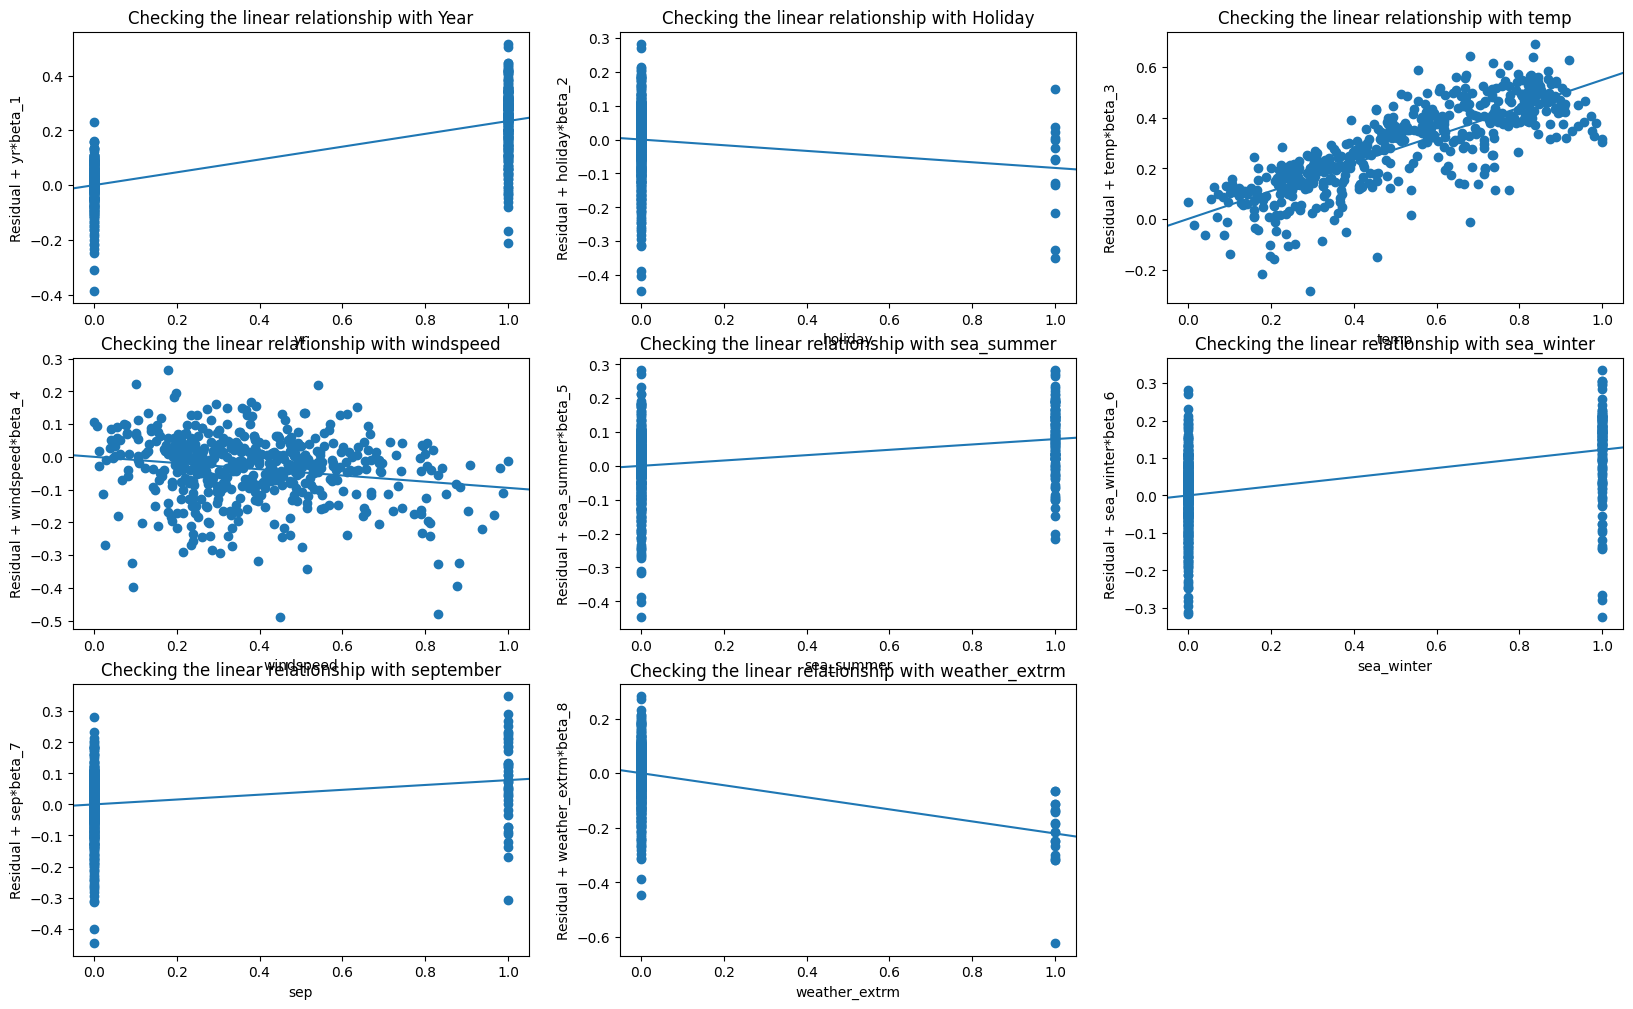

In [97]:
plt.figure(figsize = (20,12))

ax1 = plt.subplot(3,3,1)
sm.graphics.plot_ccpr(lm8,'yr',ax = ax1)
plt.title("Checking the linear relationship with Year")

ax1 = plt.subplot(3,3,2)
sm.graphics.plot_ccpr(lm8,'holiday',ax = ax1)
plt.title("Checking the linear relationship with Holiday")


ax1 = plt.subplot(3,3,3)
sm.graphics.plot_ccpr(lm8,'temp',ax = ax1)
plt.title("Checking the linear relationship with temp")


ax1 = plt.subplot(3,3,4)
sm.graphics.plot_ccpr(lm8,'windspeed',ax = ax1)
plt.title("Checking the linear relationship with windspeed")


ax1 = plt.subplot(3,3,5)
sm.graphics.plot_ccpr(lm8,'sea_summer',ax = ax1)
plt.title("Checking the linear relationship with sea_summer")

ax1 = plt.subplot(3,3,6)
sm.graphics.plot_ccpr(lm8,'sea_winter',ax = ax1)
plt.title("Checking the linear relationship with sea_winter")

ax1 = plt.subplot(3,3,7)
sm.graphics.plot_ccpr(lm8,'sep',ax = ax1)
plt.title("Checking the linear relationship with september")


ax1 = plt.subplot(3,3,8)
sm.graphics.plot_ccpr(lm8,'weather_extrm',ax = ax1)
plt.title("Checking the linear relationship with weather_extrm")

plt.show()







#### We are able to clearly see linear relationship with windspeed and temp which are numerical variable and for Categorical variables we can see indicative linear relationship on the value of 0 and 1

In [ ]:
## Analysis of Residuals on Training data

In [98]:
# Predicting the values on training data


y_train_pred = lm8.predict(x_train_lm8)



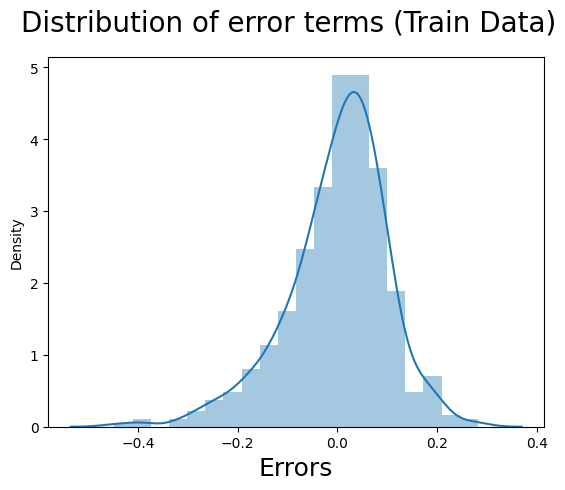

In [102]:
# Plot the histogram of error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=  20)
fig.suptitle('Distribution of error terms (Train Data)', fontsize = 20)
plt.xlabel('Errors',fontsize = 18)
plt.show()





In [ ]:
#### We can see error terms are normally distributed and centred around 0

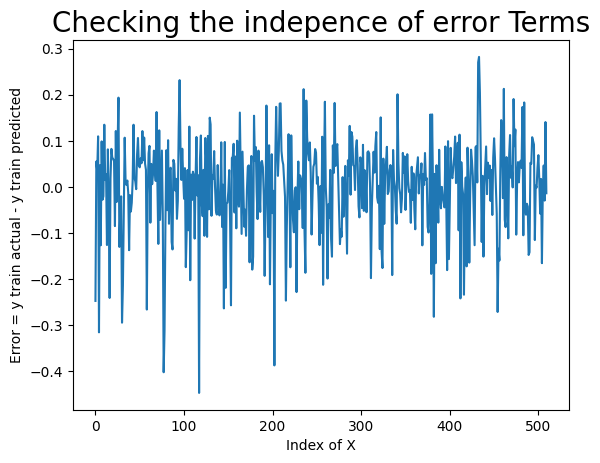

In [103]:
## Checking the indepence of error Terms

cx = [i for i in range(0, len(x_train),1)]
plt.plot(cx,y_train - y_train_pred)
plt.title('Checking the indepence of error Terms', fontsize = 20)
plt.ylabel('Error = y train actual - y train predicted')
plt.xlabel('Index of X')

plt.show()


In [ ]:
# No patterns in error terms with x hence it means they are independent

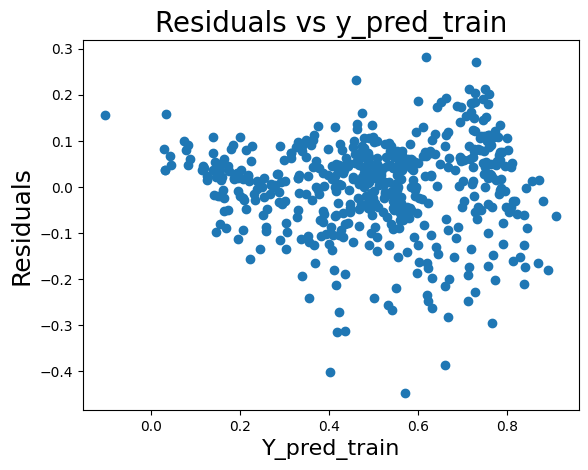

In [105]:
## Lets check Residuals vs y_pred_train

fig= plt.figure()
plt.scatter(y_train_pred,y_train - y_train_pred)
plt.title('Residuals vs y_pred_train', fontsize = 20)
plt.ylabel('Residuals', fontsize = 18)
plt.xlabel('Y_pred_train', fontsize = 16)

plt.show()


In [ ]:
## We can see that the variance in error terms is constant across all the predictions

In [106]:
## Now lets make prediction on test data

df_test[var_num] = scalar.transform(df_test[var_num])

## Splitting the data in x_test and y_test

y_test = df_test.pop('cnt')
x_test = df_test


# Creating the x_test_nwe by dropping variable from x_test

x_test_new = x_test[x_train_iter.columns]

# Adding a constant variable

x_test_lm8 = sm.add_constant(x_test_new)




In [107]:
# Predicting the values

y_pred = lm8.predict(x_test_lm8)


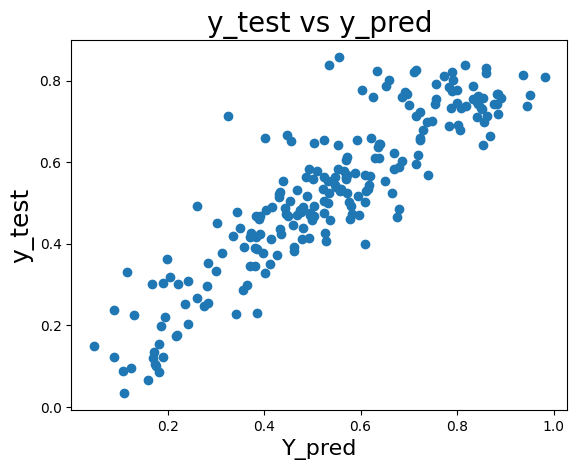

In [108]:

# y_test vs y_pred

fig= plt.figure()
plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred', fontsize = 20)
plt.ylabel('y_test', fontsize = 18)
plt.xlabel('Y_pred', fontsize = 16)

plt.show()

In [ ]:
# Calculating the R square for the Test data

In [110]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred)

# Calculating the adjusted  R squared for test data 
# Getting number of rows in x_test 

n = x_test.shape[0]

# Getting the number of features in x_test

p = x_test.shape[1]

adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

print("R Square for the test data is :",r2_test)
print("Adjusted R Square for the test data is :",adj_r2_test)






R Square for the test data is : 0.7874286037363974
Adjusted R Square for the test data is : 0.7548118286483314


# Final Interpretation

This model performs good on training data with adjust R square 0.793 as well as on test data with value 0.754
This can be generalised for making future predictions having the similar data

## Top predicting features with the coeffients are mentioned below:

###### yr                0.2347    
###### holiday          -0.0839    
###### temp              0.5500    
###### windspeed        -0.0949   
###### sea_summer        0.0791   
###### sea_winter        0.1221    
###### sep               0.0782   
###### weather_extrm    -0.2212 

## End of the assignment